In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import collections

from tqdm.auto import tqdm

import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/wassname/.pyenv/versions/3.7.2/envs/jup3.7.2/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [3]:
from src.data.gp_curves import GPCurvesReader
from src.models.model import LatentModel

In [4]:
def plot_functions(target_x, target_y, context_x, context_y, pred_y, std):
    """Plots the predicted mean and variance and the context points.
  
  Args: 
    target_x: An array of shape [B,num_targets,1] that contains the
        x values of the target points.
    target_y: An array of shape [B,num_targets,1] that contains the
        y values of the target points.
    context_x: An array of shape [B,num_contexts,1] that contains 
        the x values of the context points.
    context_y: An array of shape [B,num_contexts,1] that contains 
        the y values of the context points.
    pred_y: An array of shape [B,num_targets,1] that contains the
        predicted means of the y values at the target points in target_x.
    std: An array of shape [B,num_targets,1] that contains the
        predicted std dev of the y values at the target points in target_x.
      """
  # Plot everything
    plt.plot(target_x[0], pred_y[0], 'b', linewidth=2)
    plt.plot(target_x[0], target_y[0], 'k:', linewidth=2)
    plt.plot(context_x[0], context_y[0], 'ko', markersize=10)
    plt.fill_between(
          target_x[0, :, 0],
          pred_y[0, :, 0] - std[0, :, 0],
          pred_y[0, :, 0] + std[0, :, 0],
          alpha=0.5,
          facecolor='#65c9f7',
          interpolate=True)

  # Make the plot pretty
    plt.yticks([-2, 0, 2], fontsize=16)
    plt.xticks([-2, 0, 2], fontsize=16)
    plt.ylim([-2, 2])
    plt.grid('off')
    ax = plt.gca()
    plt.show()

In [5]:

MAX_CONTEXT_POINTS = 50 
random_kernel_parameters=True 

dataset_train = GPCurvesReader(
    batch_size=16, max_num_context=MAX_CONTEXT_POINTS, random_kernel_parameters=random_kernel_parameters)

dataset_test = GPCurvesReader(
    batch_size=1, max_num_context=MAX_CONTEXT_POINTS, testing=True, random_kernel_parameters=random_kernel_parameters)

In [6]:

model = LatentModel(1, 1, 64, latent_enc_self_attn_type="multihead", det_enc_self_attn_type="multihead",
                   det_enc_cross_attn_type="multihead").cuda()

In [7]:
optim = torch.optim.AdamW(model.parameters(), lr=1e-5)

train: 0   12


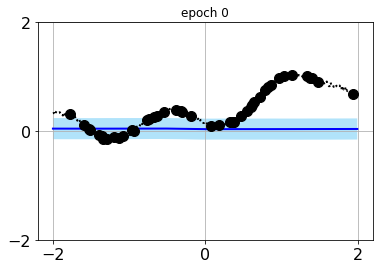

train: 100 6.391
train: 200 5.626
train: 300 6.16
train: 400 5.766
train: 500 5.624
train: 600 5.689
train: 700 5.117
train: 800 3.194
train: 900 4.035
train: 1000 3.541
train: 1100 4.288
train: 1200 4.116
train: 1300 3.648
train: 1400 2.625
train: 1500 3.166
train: 1600 3.01
train: 1700 3.108
train: 1800 3.864
train: 1900 4.774
train: 2000 2.515
train: 2100 2.655
train: 2200 3.437
train: 2300 2.293
train: 2400 2.701
train: 2500 3.267
train: 2600 2.44
train: 2700 2.663
train: 2800 2.313
train: 2900 2.96
train: 3000 3.034
train: 3100 2.297
train: 3200 2.276
train: 3300 2.389
train: 3400 2.222
train: 3500 2.562
train: 3600 1.77
train: 3700 3.312
train: 3800 2.641
train: 3900 1.478
train: 4000 1.908
train: 4100 1.738
train: 4200 2.144
train: 4300 2.049
train: 4400 1.978
train: 4500 2.141
train: 4600 2.234
train: 4700 1.66
train: 4800 2.124
train: 4900 1.431
train: 5000 1.551


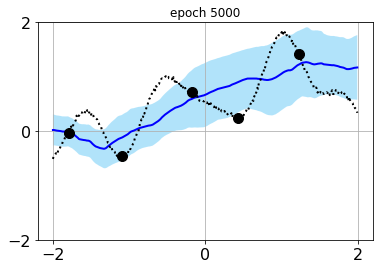

train: 5100 1.679
train: 5200 1.883
train: 5300 2.049
train: 5400 1.543
train: 5500 2.868
train: 5600 1.683
train: 5700 1.899
train: 5800 1.303
train: 5900 1.385
train: 6000 1.294
train: 6100 1.185
train: 6200 2.53
train: 6300 1.166
train: 6400 1.804
train: 6500 1.36
train: 6600 0.9277
train: 6700 1.271
train: 6800 1.094
train: 6900 1.327
train: 7000 1.138
train: 7100 1.075
train: 7200 1.835
train: 7300 1.104
train: 7400 1.488
train: 7500 1.139
train: 7600 0.6968
train: 7700 0.7172
train: 7800  1.5
train: 7900 2.028
train: 8000 1.62
train: 8100 0.5501
train: 8200 0.7213
train: 8300 0.7354
train: 8400 0.5944
train: 8500 0.6943
train: 8600 1.779
train: 8700 1.152
train: 8800 0.519
train: 8900 0.8859
train: 9000 0.4783
train: 9100 0.7806
train: 9200 0.6132
train: 9300 0.5164
train: 9400 0.7371
train: 9500 1.511
train: 9600 0.567
train: 9700 0.5146
train: 9800 0.6316
train: 9900 0.5202
train: 10000 1.142


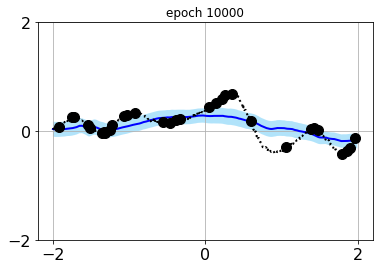

train: 10100 0.8833
train: 10200 0.5416
train: 10300 0.4089
train: 10400 0.4403
train: 10500 2.297
train: 10600 0.4174
train: 10700 1.498
train: 10800 0.6495
train: 10900 0.2989
train: 11000 0.6395
train: 11100 0.44
train: 11200 0.5389
train: 11300 0.2969
train: 11400 0.5898
train: 11500 0.2404
train: 11600 0.8724
train: 11700 0.6155
train: 11800 1.239
train: 11900 0.7685
train: 12000 0.7193
train: 12100 0.2667
train: 12200 0.4916
train: 12300 0.4796
train: 12400 0.1291
train: 12500 0.5619
train: 12600 0.06822
train: 12700 0.1349
train: 12800 0.1807
train: 12900 -0.01337
train: 13000 0.1332
train: 13100 0.1858
train: 13200 0.2523
train: 13300 0.6207
train: 13400 0.1929
train: 13500 0.3042
train: 13600 0.07761
train: 13700 0.1647
train: 13800 0.4122
train: 13900 0.3124
train: 14000 0.2281
train: 14100 0.6712
train: 14200 0.6139
train: 14300 0.4546
train: 14400 0.9218
train: 14500 0.01121
train: 14600 0.07928
train: 14700 -0.1427
train: 14800 -0.1767
train: 14900 0.3025
train: 15000 0.18

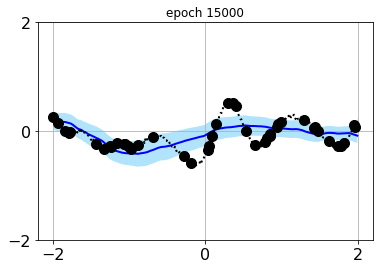

train: 15100 0.06924
train: 15200 0.104
train: 15300 -0.05432
train: 15400 0.0878
train: 15500 0.3096
train: 15600 -0.101
train: 15700 -0.1815
train: 15800 0.01411
train: 15900 -0.0145
train: 16000 0.4367
train: 16100 -0.1469
train: 16200 0.2669
train: 16300 0.3939
train: 16400 0.001367
train: 16500 0.06631
train: 16600 0.007301
train: 16700 0.05867
train: 16800 0.259
train: 16900 -0.06433
train: 17000 -0.1931
train: 17100 0.3358
train: 17200 -0.05535
train: 17300 0.08028
train: 17400 -0.332
train: 17500 -0.1409
train: 17600 -0.07089
train: 17700 -0.2534
train: 17800 0.8266
train: 17900 -0.2207
train: 18000 0.08128
train: 18100 -0.1946
train: 18200 -0.2114
train: 18300 0.5667
train: 18400 0.03189
train: 18500 -0.2915
train: 18600 0.02664
train: 18700 0.1672
train: 18800 -0.1621
train: 18900 -0.2582
train: 19000 -0.1913
train: 19100 -0.1661
train: 19200 0.2957
train: 19300 -0.3063
train: 19400 -0.1645
train: 19500 0.2155
train: 19600 0.4337
train: 19700 0.7424
train: 19800 -0.07544
trai

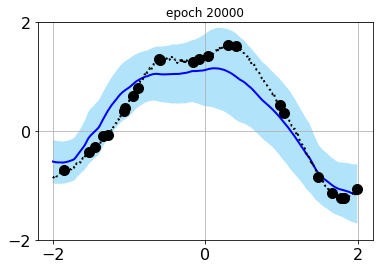

train: 20100 0.06119
train: 20200 -0.199
train: 20300 -0.1302
train: 20400 -0.2106
train: 20500 -0.2188
train: 20600 0.4964
train: 20700 -0.1303
train: 20800 1.103
train: 20900 0.09169
train: 21000 -0.3041
train: 21100 -0.4382
train: 21200 -0.181
train: 21300 -0.4443
train: 21400 -0.3059
train: 21500 0.05672
train: 21600 -0.1732
train: 21700 0.02088
train: 21800 0.2825
train: 21900 -0.2488
train: 22000 -0.2143
train: 22100 -0.3213
train: 22200 -0.2591
train: 22300 -0.005762
train: 22400 0.7372
train: 22500 -0.3272
train: 22600 -0.01348
train: 22700 -0.1986
train: 22800 -0.2316
train: 22900 0.2392
train: 23000 -0.07332
train: 23100 -0.3443
train: 23200 -0.1578
train: 23300 -0.2344
train: 23400 0.1857
train: 23500 -0.3545
train: 23600 -0.1258
train: 23700 -0.4249
train: 23800 -0.2055
train: 23900 -0.266
train: 24000 -0.3299
train: 24100 -0.3036
train: 24200 -0.2779
train: 24300 0.4617
train: 24400 -0.2216
train: 24500 -0.009392
train: 24600 -0.1579
train: 24700 -0.2255
train: 24800 -0.40

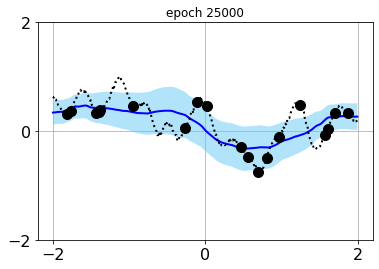

train: 25100 -0.2749
train: 25200 0.7059
train: 25300 -0.159
train: 25400 -0.4899
train: 25500 -0.3573
train: 25600 -0.3288
train: 25700 -0.4397
train: 25800 -0.3074
train: 25900 -0.2532
train: 26000 -0.4401
train: 26100 -0.1473
train: 26200 -0.04771
train: 26300 -0.2409
train: 26400 -0.1282
train: 26500 -0.1763
train: 26600 -0.4274
train: 26700 -0.3214
train: 26800 -0.2783
train: 26900 -0.2924
train: 27000 -0.4839
train: 27100 -0.1878
train: 27200 -0.3737
train: 27300 0.01148
train: 27400 -0.3291
train: 27500 -0.008919
train: 27600 -0.4141
train: 27700 0.02007
train: 27800 -0.4151
train: 27900 -0.4876
train: 28000 -0.2893
train: 28100 0.03273
train: 28200 -0.3545
train: 28300 -0.08176
train: 28400 -0.5277
train: 28500 -0.3849
train: 28600 -0.1808
train: 28700 0.6243
train: 28800 -0.1382
train: 28900 -0.4157
train: 29000 -0.5043
train: 29100 -0.2007
train: 29200 -0.2879
train: 29300 -0.03593
train: 29400 -0.4114
train: 29500 -0.09357
train: 29600 -0.1297
train: 29700 -0.3818
train: 298

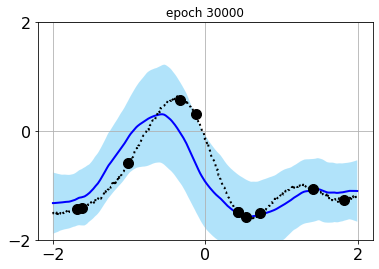

train: 30100 0.016
train: 30200 -0.3577
train: 30300 -0.1435
train: 30400 -0.09736
train: 30500 -0.3209
train: 30600 -0.4411
train: 30700 -0.3613
train: 30800 -0.3102
train: 30900 0.003127
train: 31000 -0.3805
train: 31100 -0.5039
train: 31200 -0.2611
train: 31300 0.4362
train: 31400 -0.1305
train: 31500 -0.06019
train: 31600 -0.09598
train: 31700 -0.1576
train: 31800 -0.07163
train: 31900 -0.3561
train: 32000 -0.365
train: 32100 -0.5078
train: 32200 -0.1704
train: 32300 -0.4464
train: 32400 -0.3407
train: 32500 -0.4767
train: 32600 -0.4733
train: 32700 -0.2781
train: 32800 -0.5611
train: 32900 -0.4024
train: 33000 -0.3068
train: 33100 -0.5028
train: 33200 -0.2751
train: 33300 -0.239
train: 33400 -0.4221
train: 33500 -0.3042
train: 33600 -0.4042
train: 33700 -0.5841
train: 33800 -0.115
train: 33900 -0.4258
train: 34000 -0.1761
train: 34100 -0.4703
train: 34200 -0.2885
train: 34300 -0.2225
train: 34400 -0.4583
train: 34500 -0.2198
train: 34600 -0.4471
train: 34700 -0.5334
train: 34800 -

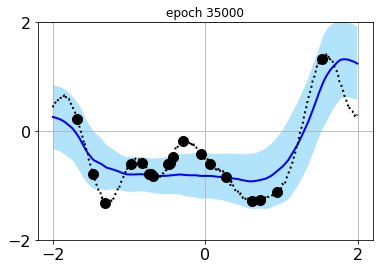

train: 35100 -0.2951
train: 35200 -0.0906
train: 35300 -0.04057
train: 35400 -0.1684
train: 35500 -0.415
train: 35600 -0.1741
train: 35700 -0.3815
train: 35800 -0.4587
train: 35900 -0.2565
train: 36000 -0.3454
train: 36100 -0.3148
train: 36200 -0.3147
train: 36300 -0.008909
train: 36400 -0.4153
train: 36500 -0.3658
train: 36600 -0.1066
train: 36700 -0.4122
train: 36800 -0.3988
train: 36900 1.394
train: 37000 -0.4366
train: 37100 -0.3834
train: 37200 -0.2065


In [ ]:
epochs = 100000
for epoch in tqdm(range(epochs)):
    model.train()
    data_train = dataset_train.generate_curves()
    (context_x, context_y), target_x = data_train.query
    target_y = data_train.target_y
    context_x = context_x.cuda()
    context_y = context_y.cuda()
    target_x = target_x.cuda()
    target_y = target_y.cuda()

    optim.zero_grad()
    y_pred, kl, loss, y_std = model(context_x, context_y, target_x, target_y)
    if epoch % 100 == 0:
        print(f"train: {epoch} {loss.item():4.4g}")
    loss.backward()
    optim.step()
    if epoch % 5000 == 0:
        model.eval()
        with torch.no_grad():
            data_test = dataset_test.generate_curves()
            (context_x, context_y), target_x = data_test.query
            target_y = data_test.target_y
            context_x = context_x.cuda()
            context_y = context_y.cuda()
            target_x = target_x.cuda()
            target_y = target_y.cuda()
            y_pred, kl, loss, y_std = model(context_x, context_y, target_x)
            plt.title(f"epoch {epoch}")
            plot_functions(target_x.detach().cpu().numpy(),
                           target_y.detach().cpu().numpy(),
                           context_x.detach().cpu().numpy(),
                           context_y.detach().cpu().numpy(),
                           y_pred.detach().cpu().numpy(),
                           y_std.detach().cpu().numpy())